# Sentence Splitting

In [4]:
text_a = "At some schools, even professionals boasting Ph.D. degrees are coming back to school for Master’s degrees."
text_b = '"It\'s been really tough," the celebrity chef @jamieoliver tells Good Food from his headquarters in north London :-( . '

In [5]:
import nltk
from nltk.tokenize import sent_tokenize

sent_token_list_a = sent_tokenize(text_a)

print('News text: ')
for sent in sent_token_list_a:
    print(sent)

sent_token_list_b = sent_tokenize(text_b)
print('\nTweets: ')
for sent in sent_token_list_b:
    print(sent)


News text: 
At some schools, even professionals boasting Ph.D. degrees are coming back to school for Master’s degrees.

Tweets: 
"It's been really tough," the celebrity chef @jamieoliver tells Good Food from his headquarters in north London :-( .


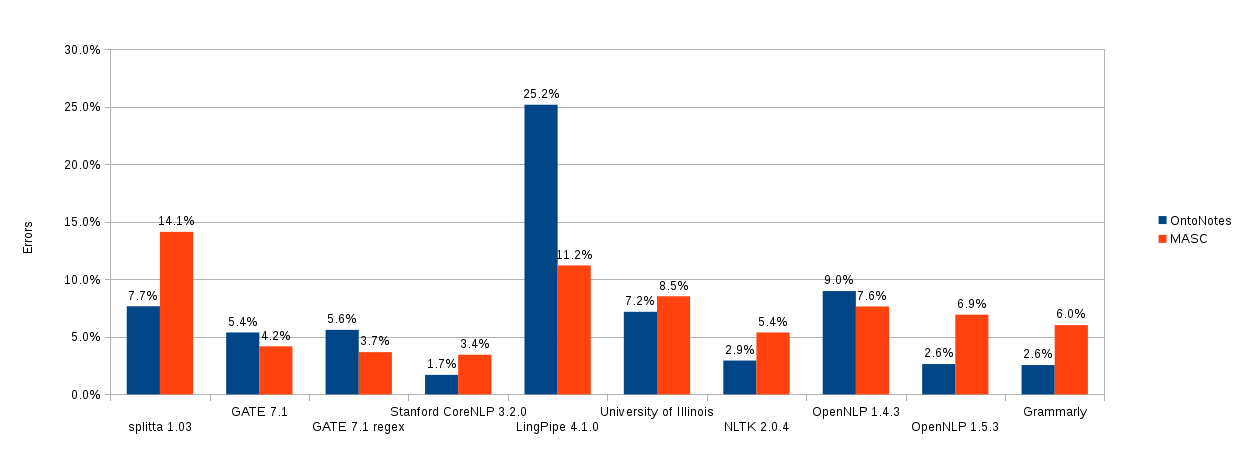

# Word Tokenization

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

regex_tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

print('Use RegexpTokenizer : ')
for sent in sent_token_list_a:
    print(regex_tokenizer.tokenize(sent))
    
for sent in sent_token_list_b:
    print(regex_tokenizer.tokenize(sent))

print('\nUse word_tokenize : ')
for sent in sent_token_list_a:
    print(word_tokenize(sent))
    
for sent in sent_token_list_b:
    print(word_tokenize(sent))

Use RegexpTokenizer : 
['At', 'some', 'schools', ',', 'even', 'professionals', 'boasting', 'Ph', '.D.', 'degrees', 'are', 'coming', 'back', 'to', 'school', 'for', 'Master', '’s', 'degrees', '.']
['"It\'s', 'been', 'really', 'tough', ',"', 'the', 'celebrity', 'chef', '@jamieoliver', 'tells', 'Good', 'Food', 'from', 'his', 'headquarters', 'in', 'north', 'London', ':-(', '.']

Use word_tokenize : 
['At', 'some', 'schools', ',', 'even', 'professionals', 'boasting', 'Ph.D.', 'degrees', 'are', 'coming', 'back', 'to', 'school', 'for', 'Master', '’', 's', 'degrees', '.']
['``', 'It', "'s", 'been', 'really', 'tough', ',', "''", 'the', 'celebrity', 'chef', '@', 'jamieoliver', 'tells', 'Good', 'Food', 'from', 'his', 'headquarters', 'in', 'north', 'London', ':', '-', '(', '.']


# Morphology

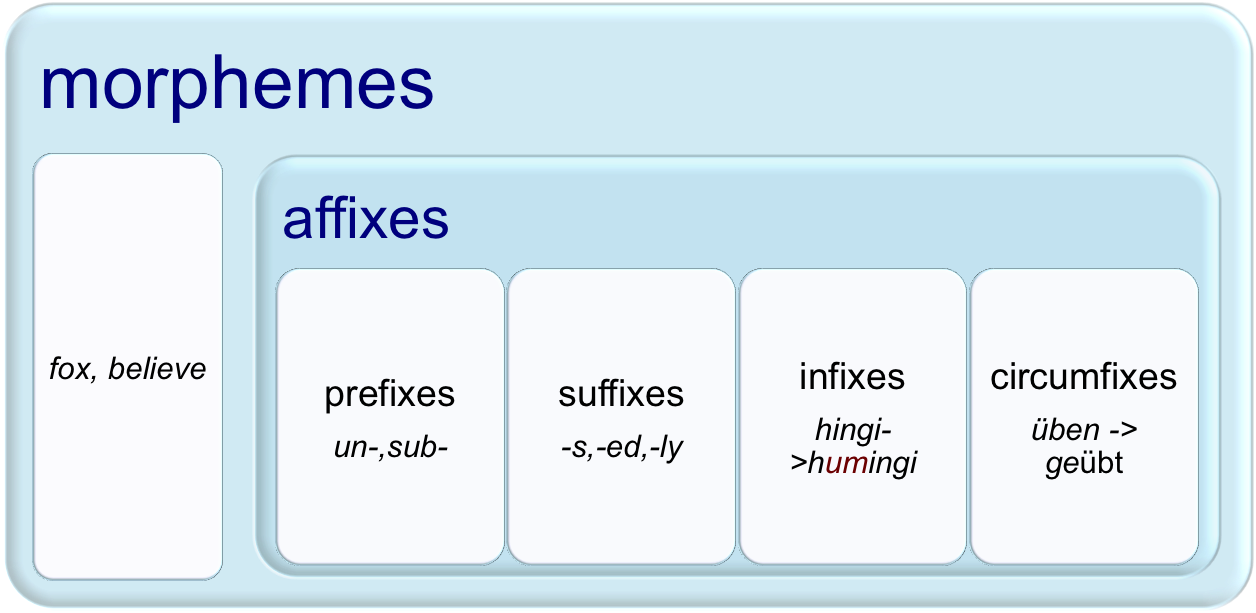

-  Inflection.
  -  combination of a word stem with a grammatical morpheme.
  -  same word class, e.g. mouse -> mice, chidren’s, walks, walked, ate, cut.
-  Derivation.
  -  combination of a word stem with a grammatical morpheme.
  -  different word class, e.g. appoint -> appointment, computation -> computational

# Stemming

A crude heuristic process that strips off suffixes.


In [7]:
from nltk.stem import *

stemmer = PorterStemmer()

print('News text: ')
for sent in sent_token_list_a:
    print([stemmer.stem(word) for word in word_tokenize(sent)])

print('\nTweets: ')
for sent in sent_token_list_b:
    print([stemmer.stem(word) for word in regex_tokenizer.tokenize(sent)])

News text: 
['At', 'some', 'school', ',', 'even', 'profession', 'boast', 'ph.d.', 'degre', 'are', 'come', 'back', 'to', 'school', 'for', 'master', '’', 's', 'degre', '.']

Tweets: 
['"it\'', 'been', 'realli', 'tough', ',"', 'the', 'celebr', 'chef', '@jamieoliv', 'tell', 'good', 'food', 'from', 'hi', 'headquart', 'in', 'north', 'london', ':-(', '.']


# Part-of-Speech

-  ### Closed class categories are composed of a small, fixed set of grammatical function words for a given language.
  -  Pronouns, Prepositions, Modals, Determiners, Particles, Conjunctions.


-  ### Open class categories have a large number of words and new ones are easily invented.
  - Nouns (Googler), Verbs (google), Adjectives (geeky), Abverb (chompingly) 


In [8]:
print('News text: ')
for sent in sent_token_list_a:
    tokens = word_tokenize(sent)
    print(nltk.pos_tag(tokens))

News text: 
[('At', 'IN'), ('some', 'DT'), ('schools', 'NNS'), (',', ','), ('even', 'RB'), ('professionals', 'NNS'), ('boasting', 'VBG'), ('Ph.D.', 'NNP'), ('degrees', 'NNS'), ('are', 'VBP'), ('coming', 'VBG'), ('back', 'RB'), ('to', 'TO'), ('school', 'NN'), ('for', 'IN'), ('Master', 'NNP'), ('’', 'NNP'), ('s', 'NN'), ('degrees', 'NNS'), ('.', '.')]


In [9]:
print('News text: ')
for sent in sent_token_list_a:
    tokens = word_tokenize(sent)
    print(nltk.pos_tag(tokens, tagset='universal'))

News text: 
[('At', 'ADP'), ('some', 'DET'), ('schools', 'NOUN'), (',', '.'), ('even', 'ADV'), ('professionals', 'NOUN'), ('boasting', 'VERB'), ('Ph.D.', 'NOUN'), ('degrees', 'NOUN'), ('are', 'VERB'), ('coming', 'VERB'), ('back', 'ADV'), ('to', 'PRT'), ('school', 'NOUN'), ('for', 'ADP'), ('Master', 'NOUN'), ('’', 'NOUN'), ('s', 'NOUN'), ('degrees', 'NOUN'), ('.', '.')]


In [10]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_sents(tagset='universal')
brown_news_words = brown.tagged_words(tagset='universal')

In [11]:
from nltk.probability import FreqDist

# distinct words and their frequencies.
dist_words = FreqDist([w for (w, t) in brown_news_words])
print('There are {} words in total. Among them there are {} distinct words.'.format(dist_words.N(), len(dist_words))) 

There are 1161192 words in total. Among them there are 56057 distinct words.


In [12]:
dist_words.most_common(10)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011)]

In [13]:
'%5.2f%%' % (dist_words.freq('the') * 100)

' 5.40%'

In [14]:
from nltk import UnigramTagger
brown_train = brown_news_tagged[5000:]
brown_test = brown_news_tagged[:5000]

unigram_tagger = UnigramTagger(brown_train)

In [15]:
for sent in sent_token_list_a:
    tokens = word_tokenize(sent)
    print(unigram_tagger.tag(tokens))

[('At', 'ADP'), ('some', 'DET'), ('schools', 'NOUN'), (',', '.'), ('even', 'ADV'), ('professionals', 'NOUN'), ('boasting', 'VERB'), ('Ph.D.', None), ('degrees', 'NOUN'), ('are', 'VERB'), ('coming', 'VERB'), ('back', 'ADV'), ('to', 'PRT'), ('school', 'NOUN'), ('for', 'ADP'), ('Master', 'NOUN'), ('’', None), ('s', None), ('degrees', 'NOUN'), ('.', '.')]


In [16]:
print(unigram_tagger.tag(word_tokenize('I like candy.')))

print(unigram_tagger.tag(word_tokenize('Time flies like an arrow.')))

[('I', 'PRON'), ('like', 'ADP'), ('candy', 'NOUN'), ('.', '.')]
[('Time', 'NOUN'), ('flies', 'NOUN'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), ('.', '.')]


In [17]:
print(nltk.pos_tag(word_tokenize('I like candy.'), tagset='universal'))

print(nltk.pos_tag(word_tokenize('Time flies like an arrow.'), tagset='universal'))

[('I', 'PRON'), ('like', 'VERB'), ('candy', 'NOUN'), ('.', '.')]
[('Time', 'NOUN'), ('flies', 'NOUN'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), ('.', '.')]
